In [94]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import random

### P of a random continuous variable

What is the probability of picking the value 2.8946 from the range [0, 10]?

Unlike a discrete variable, a continuous variable is not countable. There are infinite number of values in a continuous range such as [0, 10].

So picking a particular value from a continuous range is practically 0.

But P of picking a value from a particular "sub-range" can be calculated.

### Uniform (Rectangular) Distribution

Outcome of throwing a die follows a Discrete Uniform Distribution:
P(X=x) = 1/6, x=1,2,3,4,5,6

Continuous Uniform Distribution:
P(X=x) = p, x=[0,6]

The live timetable for a bus: 6 mins

Probability of the bus to arrive is 1/6 at any minute interval for the next 6 mins.

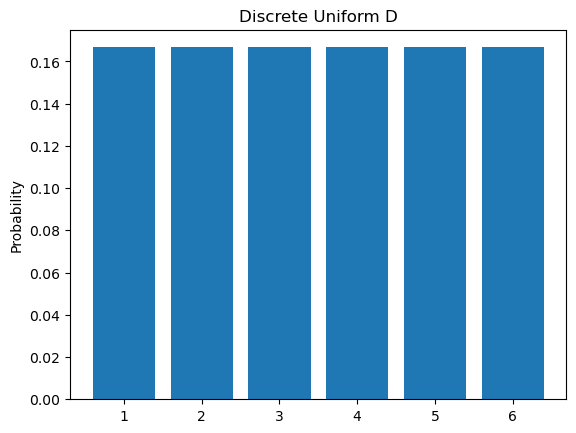

In [3]:
plt.bar(list(range(1,7)), 1/6)
plt.ylabel("Probability")
plt.title("Discrete Uniform D")
plt.show()

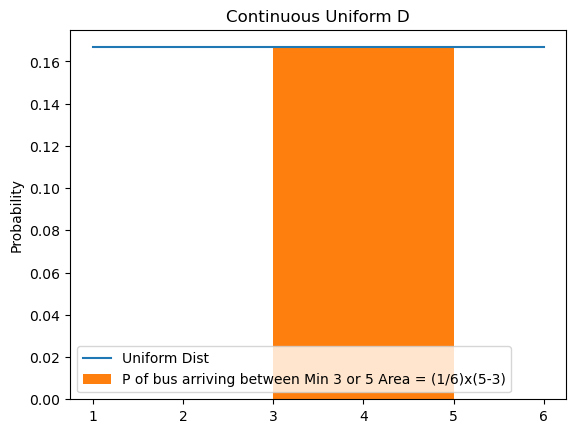

In [69]:
plt.plot(list(range(1,7)), [1/6 for i in range(6)])
plt.hist([3, 4, 5], weights=[1/6, 1/6, 1/6], align="mid", stacked=True, bins=3)
plt.ylabel("Probability")
plt.title("Continuous Uniform D")
plt.legend(["Uniform Dist", "P of bus arriving between Min 3 or 5 Area = (1/6)x(5-3)"])
plt.show()

### Normal Distribution

Continuous analogue of the binomial distribution.

In [53]:
def Binomial(n, k, p):
    return math.comb(n, k)*(p**k)*((1-p)**(n-k))

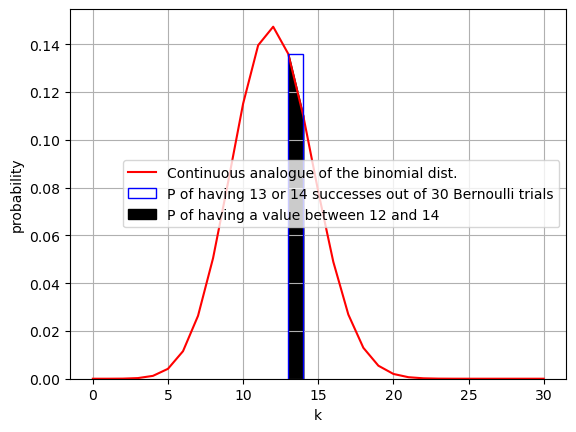

In [79]:
plt.plot(list(range(0, 31)), [Binomial(30, i, 0.4) for i in range(0, 31)], color="red")
plt.hist([13, 14], weights=[Binomial(30, 13, 0.4) for i in range(2)], align="mid", stacked=True, bins=2, color="blue", histtype="step")
plt.fill_between([13, 14], [Binomial(30, 13, 0.4), Binomial(30, 14, 0.4)], color="black")
plt.xlabel("k")
plt.ylabel("probability")
plt.legend(["Continuous analogue of the binomial dist.", 
           "P of having 13 or 14 successes out of 30 Bernoulli trials",
           "P of having a value between 12 and 14"])
plt.grid()
plt.show()

### Formal definition of a Pdf

The probability-density function of the random variable X is a function such that the area under the density-function curve between any two points *a* and *b* is equal to the probability that the random variable X falls between *a* and *b*. Thus, the total area under the density-function curve over the entire range of possible values for the random variable is 1.

### Cdf: Area under Pdf curve

The cumulative-distribution function for the random variable X evaluated at the point *a* is defined as the probability that X will take on values <= *a*. It is represented by the area under the pdf to the left of *a*.

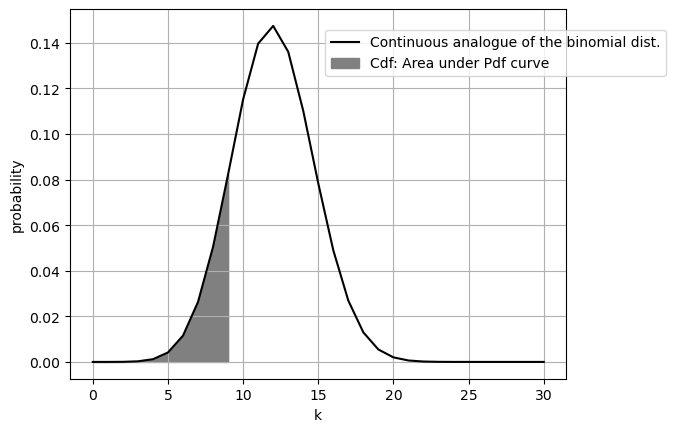

In [93]:
plt.plot(list(range(0, 31)), [Binomial(30, i, 0.4) for i in range(0, 31)], color="black")
plt.fill_between(list(range(10)), [Binomial(30, i, 0.4) for i in range(10)], color="grey")
plt.xlabel("k")
plt.ylabel("probability")
plt.legend(["Continuous analogue of the binomial dist.",
           "Cdf: Area under Pdf curve"], loc="lower left", bbox_to_anchor=[0.5, 0.8])
plt.grid()
plt.show()

### Pdf of Normal Distribution

f(x) = (1/sqrt(2*pi*sigma))*exp((-1/(2sigma^2))*(x-mü)^2)

1. Why not P(X=k) but f(x)?
- That is because Pdf of ND is a continuous function, traditionally f(x)
- Continuous function: Mathematical relationship that can be evaluated in a continuous range, such as any number between 0 and 10.
2. Where did pdf come from?
- It is derived from pdf of Binomial Distribution based on Stirling's Formula, by assuming n goes to infinity.

In [150]:
def NormalDist(x):
    return (1/(math.sqrt(2*math.pi)*np.std(x)))*(math.e**((-1/(2*np.std(x)**2))*((x-np.mean(x))**2)))

In [151]:
def NormalDistv2(x, mu, sigma):
    return (1/(math.sqrt(2*math.pi)*sigma))*(math.e**((-1/(2*sigma**2))*((x-mu)**2)))

In [152]:
NormalDist(np.arange(1, 100))

array([0.00320978, 0.00340617, 0.00361016, 0.00382168, 0.00404065,
       0.00426693, 0.00450037, 0.00474078, 0.00498791, 0.00524151,
       0.00550126, 0.00576681, 0.00603779, 0.00631376, 0.00659427,
       0.00687881, 0.00716685, 0.00745781, 0.00775109, 0.00804605,
       0.008342  , 0.00863826, 0.00893409, 0.00922875, 0.00952146,
       0.00981143, 0.01009786, 0.01037994, 0.01065683, 0.01092773,
       0.01119179, 0.01144822, 0.01169618, 0.0119349 , 0.01216358,
       0.01238147, 0.01258785, 0.012782  , 0.01296327, 0.01313101,
       0.01328465, 0.01342364, 0.01354749, 0.01365575, 0.01374802,
       0.01382399, 0.01388336, 0.01392593, 0.01395153, 0.01396007,
       0.01395153, 0.01392593, 0.01388336, 0.01382399, 0.01374802,
       0.01365575, 0.01354749, 0.01342364, 0.01328465, 0.01313101,
       0.01296327, 0.012782  , 0.01258785, 0.01238147, 0.01216358,
       0.0119349 , 0.01169618, 0.01144822, 0.01119179, 0.01092773,
       0.01065683, 0.01037994, 0.01009786, 0.00981143, 0.00952

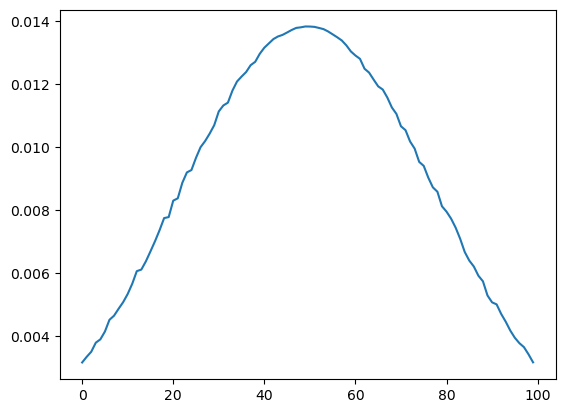

In [153]:
plt.plot(NormalDist(np.arange(0, 100)-np.random.random(100)+0.5))

In [176]:
test1 = np.arange(0, 100) - np.random.random(100) + 0.5 
mu = np.mean(test1)
sigma = np.std(test1)
NormalDistv2(40, mu, sigma)

0.013107233226386778

In [177]:
NormalDistv2(140, mu, sigma)

0.00010025236641433429

In [178]:
NormalDistv2(400, mu, sigma)

1.111146467242836e-34

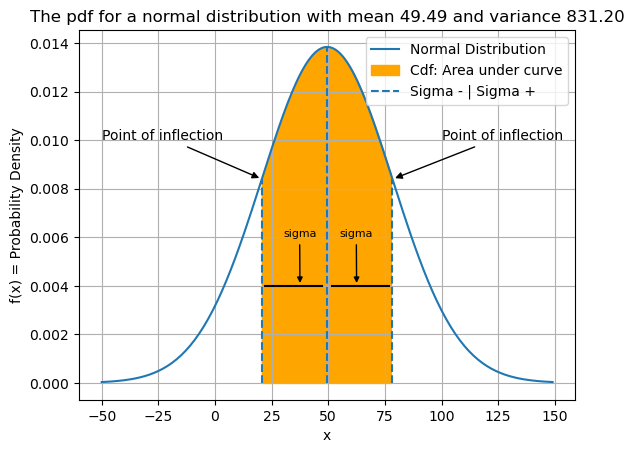

In [364]:
plt.plot(np.arange(-50, 150), 
         [NormalDistv2(i, mu, sigma) for i in np.arange(-50, 150)])
plt.fill_between(np.arange(49.5-sigma, 49.5+sigma), 
                 [NormalDistv2(i, mu, sigma) for i in np.arange(49.5-sigma, 49.5+sigma)], 
                 color="orange")
plt.vlines(x=[49.5-sigma, 49.5, 49.5+sigma], ymin=[0, 0, 0], # plt.axvline for single
            ymax=[NormalDistv2(i, mu, sigma) for i in [49.5-sigma, 49.5, 49.5+sigma]]
           , ls="--")
plt.axhline(y=0.004, xmin=0.375, xmax=0.49, color="black")
plt.axhline(y=0.004, xmin=0.51, xmax=0.625, color="black")
#plt.arrow(0, 0.01, 11, -0.0009,
 #        head_width=0.0008, head_length=10, width=0.00008, color="green")
#plt.arrow(100, 0.01, -11, -0.0009,
 #        head_width=0.0008, head_length=10, width=0.00008, color="green")
plt.xlabel("x")
plt.ylabel("f(x) = Probability Density")
plt.title(f"The pdf for a normal distribution with mean {np.mean(test1):.2f} and variance {np.std(test1)**2:.2f}")
plt.annotate("Point of inflection", xy=(49.5-sigma,NormalDistv2(49.5-sigma, mu, sigma)),
            xytext=(-50, 0.01), fontsize=10, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.annotate("Point of inflection", xy=(49.5+sigma,NormalDistv2(49.5+sigma, mu, sigma)),
            xytext=(100, 0.01), fontsize=10, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.annotate("sigma", xy=(62.5, 0.004),
            xytext=(55, 0.006), fontsize=8, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.annotate("sigma", xy=(37.5, 0.004),
            xytext=(30, 0.006), fontsize=8, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.legend(["Normal Distribution", "Cdf: Area under curve", "Sigma - | Sigma +"],
          loc = "upper right") 
plt.grid()
plt.show()

In Binomial distribution we counted the trials and P of successes.

In Normal distribution, we evaluate P of uncountable data readings, therefore mü and sigma gives us a better description of the data.

In [289]:
mu1 = 50
mu2 = 70
sigma1 = 10
sigma2 = 20

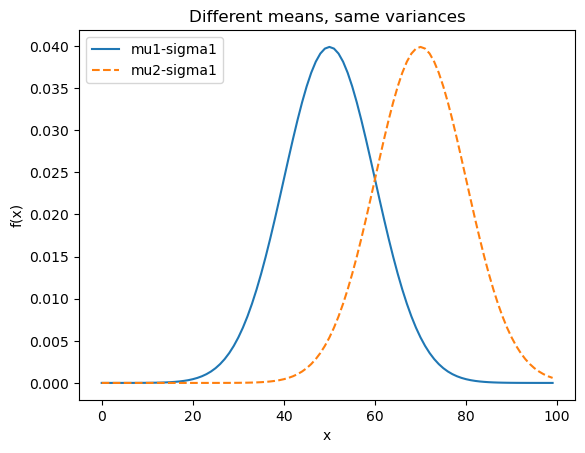

In [290]:
plt.plot(np.arange(0, 100), [NormalDistv2(i, mu1, sigma1) for i in np.arange(0, 100)])
plt.plot(np.arange(0, 100), [NormalDistv2(i, mu2, sigma1) for i in np.arange(0, 100)],
        "--")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Different means, same variances")
plt.legend(["mu1-sigma1", "mu2-sigma1"])
plt.show()

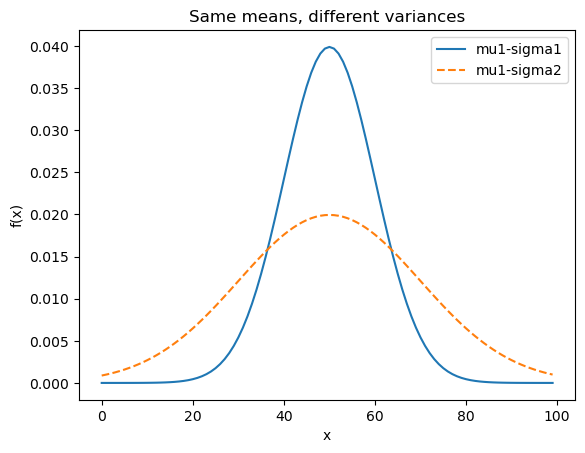

In [291]:
plt.plot(np.arange(0, 100), [NormalDistv2(i, mu1, sigma1) for i in np.arange(0, 100)])
plt.plot(np.arange(0, 100), [NormalDistv2(i, mu1, sigma2) for i in np.arange(0, 100)],
        "--")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Same means, different variances")
plt.legend(["mu1-sigma1", "mu1-sigma2"])
plt.show()

### Standard Normal Distribution

A normal distribution with mean 0 and variance 1 is called a standard, or unit normal distribution. This distribution is also called an N(0,1) distribution.

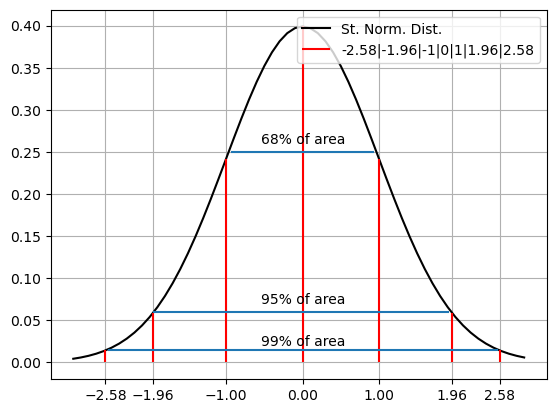

In [346]:
x = [-2.58, -1.96, -1, 0, 1, 1.96, 2.58]
plt.plot(np.arange(-30, 30)/10, [NormalDistv2(i, 0, 1) for i in np.arange(-30, 30)/10],
        color="black")
plt.vlines(x=x, ymin=0, ymax=[NormalDistv2(i, 0, 1) for i in x], color="r")
plt.axhline(y=0.25, xmin=2.19/6, xmax=3.9/6)
plt.axhline(y=0.06, xmin=1.25/6, xmax=4.8/6)
plt.axhline(y=0.015, xmin=0.7/6, xmax=5.4/6)
plt.xticks(x)
plt.annotate("68% of area", xy=(0, 0.25),
            xytext=(-0.55, 0.26), fontsize=10)
plt.annotate("95% of area", xy=(0, 0.06),
            xytext=(-0.55, 0.07), fontsize=10)
plt.annotate("99% of area", xy=(0, 0.01),
            xytext=(-0.55, 0.02), fontsize=10)
plt.legend(["St. Norm. Dist.", "-2.58|-1.96|-1|0|1|1.96|2.58"], loc="upper right")
plt.grid()
plt.show()

### Cdf for Standard Normal Distribution

Area to the left of x

Symmetry Properties of the Standard Normal Distribution
P(-1.96) = 1-P(1.96)

The (100 x u)th percentile of a standard normal distribution is denoted by zu. 
Percentiles of SND are useful in data analysis.
For example, data can be converted into z-values, and then the data points beyond (100 x u)th percentile is flagged as "outliers"

### Z-value

Z = (X - mü)/sigma

Any random variable X from a normal distribution can be converted into a Z-value.

There are a number of powerful statistical tests that can be done on Z-values.

Therefore, it can be very useful to convert any variable X into a Z-value.

Only if distribution of X satisfies the assumption of *normality*!

X - mü -> Shifts the distribution on x-axis from mü to 0

X / sigma -> Changes "width" and "height" of the distribution. If sigma>1, X/sigma makes the values smaller, and squeezes more data points to range -1<Z<1

Standardization is also called "auto-scaling".

### Probability for normal distribution and SND

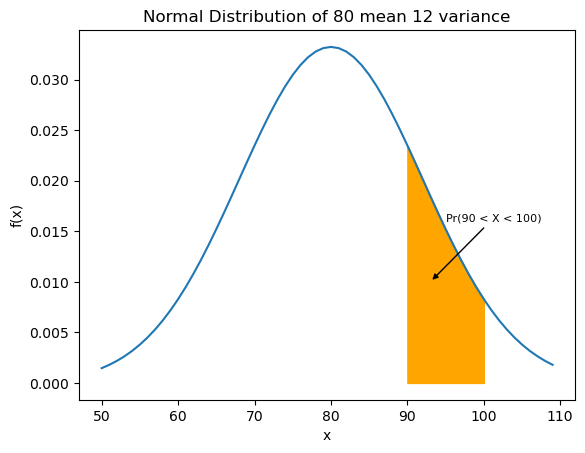

In [353]:
plt.plot(np.arange(50, 110), [NormalDistv2(i, 80, 12) for i in np.arange(50, 110)])
plt.fill_between(np.arange(90, 101), 
                 [NormalDistv2(i, 80, 12) for i in np.arange(90, 101)], 
                 color="orange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Normal Distribution of 80 mean 12 variance")
plt.annotate("Pr(90 < X < 100)", xy=(93, 0.01),
            xytext=(95, 0.016), fontsize=8, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.show()

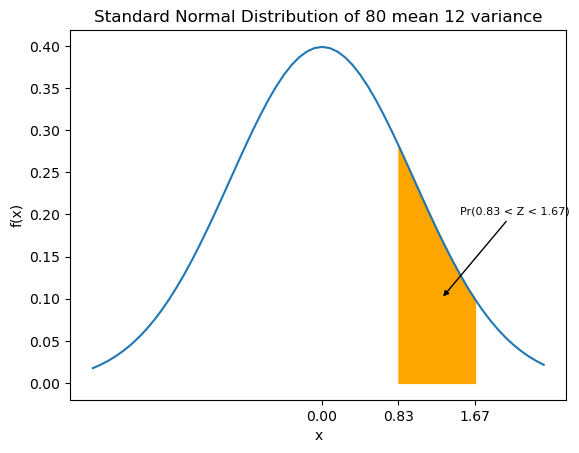

In [354]:
plt.plot((np.arange(50, 110)-80)/12, [NormalDistv2(i, 0, 1) for i in (np.arange(50, 110)-80)/12])
plt.fill_between((np.arange(90, 101)-80)/12, 
                 [NormalDistv2(i, 0, 1) for i in (np.arange(90, 101)-80)/12], 
                 color="orange")
plt.xlabel("x")
plt.xticks([0, 0.83, 1.67])
plt.ylabel("f(x)")
plt.title("Standard Normal Distribution of 80 mean 12 variance")
plt.annotate("Pr(0.83 < Z < 1.67)", xy=(1.3, 0.1),
            xytext=(1.5, 0.2), fontsize=8, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.show()

In [379]:
stats.norm.pdf([89.5, 100.5], 80, 12)

array([0.0243016 , 0.00772691])

In [380]:
stats.norm.cdf([89.5, 100.5], 80, 12)

array([0.78572247, 0.95621275])

### Pth percentile

The pth percentile of a general normal distribution (x) can also be written in terms of the percentiles of a standard normal distribution.

x = mü + z*sigma

This rule also reminds us how to map Z-value back to its original value X:

For Z = (X - mü)/sigma

X = mü + Z*sigma

### Example - Ophthalmology

Glaucoma is an eye disease that is manifested by high intraocular pressure (IOP). The distribution of IOP in the general population is approximately normal with mean = 16mm Hg and standard deviation = 3mm Hg. If the normal range for IOP is considered to be between 12 and 20mm Hg, then what percentage of the general population would fall within this range?

!!!**Be careful about incorporating a continuity correction** Pr(11.5<X<20.5)

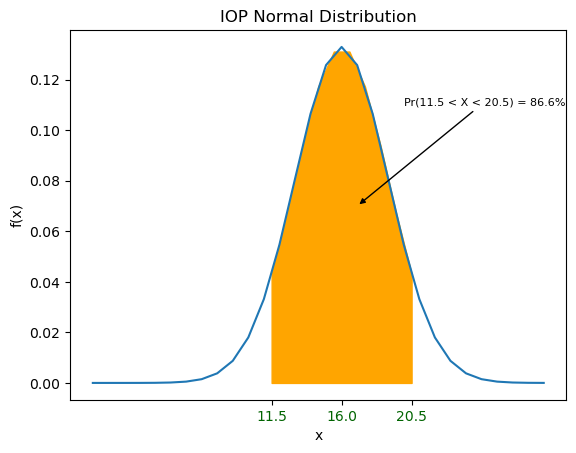

In [386]:
plt.plot(np.arange(0, 30), [NormalDistv2(i, 16, 3) for i in np.arange(0, 30)])
plt.fill_between(np.arange(11.5, 21.5), 
                 [NormalDistv2(i, 16, 3) for i in np.arange(11.5, 21.5)], 
                 color="orange")
plt.xlabel("x")
plt.xticks([11.5, 16, 20.5], color="darkgreen")
plt.ylabel("f(x)")
plt.title("IOP Normal Distribution")
plt.annotate("Pr(11.5 < X < 20.5) = 86.6%", xy=(17, 0.07),
            xytext=(20, 0.11), fontsize=8, 
            arrowprops={"arrowstyle":"-|>", "color":"black"})
plt.show()

In [372]:
IOP1220 = stats.norm.cdf([11.5,20.5], 16, 3)
print(f"Pr(11.5<X<20.5) = {100*(IOP1220[1] - IOP1220[0]):.1f}%")

Pr(11.5<X<20.5) = 86.6%


In [376]:
stats.norm.pdf([11.5, 20.5], 16, 3)

array([0.04317253, 0.04317253])

### Linear Combinations of Random Variables

Measurement of total protein (TP) content in a cell. 
Suppose proteins in the membranes (MP) and in the cytosol (CP) are isolated and measured separately. 
Both MP and CP are random variables.
TP = c1 x MP + c2 x CP

c1 and c2 are some constants such as volume of samples.

### Expected Value

E(TP) = c1 x E(MP) + c2 x E(CP)

-> Mean of the Total Proteins can be calculated from mean of the membrane proteins and cytosolic proteins, weight by coefficients c1 and c2.

### Variance

Var(TP) = c1^2 x Var(MP) + c2^2 x Var(CP)

-> Stdev(TP) = sqrt(c1^2 x Var(MP) + c2^2 x Var(CP))
-> Mean is a linear combination, Variance and Stdev are not!!!

### Linear Combination of Independent Normal Random Variables

MP: Membrane proteins, measured in mg/µm^2

E(MP) = 1, Stdev(0.5)

CP: Cytosolic proteins, measured in mg/µm^3

E(CP) = 2, Stdev(0.3)

TP = c1 x MP + c2 x CP

Cell surface = 1µm^2
Cell volume = 0.4µm^3

In [388]:
EMP = 1
sigmaMP = 0.5
ECP = 2
sigmaCP = 0.3
c1 = 1
c2 = 0.4
ETP = c1*EMP + c2*ECP
sigmaTP = math.sqrt((c1**2)*(sigmaMP**2) + (c2**2)*(sigmaCP**2))

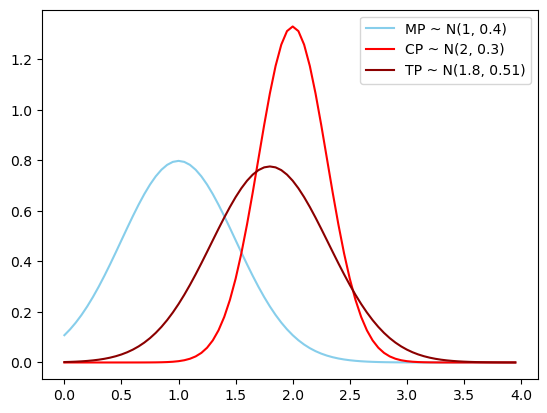

In [400]:
plt.plot(np.arange(0, 4, 0.05), [stats.norm.pdf(i, EMP, sigmaMP) for i in np.arange(0, 4, 0.05)],
        color="skyblue")
plt.plot(np.arange(0, 4, 0.05), [stats.norm.pdf(i, ECP, sigmaCP) for i in np.arange(0, 4, 0.05)],
        color="red")
plt.plot(np.arange(0, 4, 0.05), [stats.norm.pdf(i, ETP, sigmaTP) for i in np.arange(0, 4, 0.05)],
        color="darkred")
plt.legend(["MP ~ N(1, 0.4)", "CP ~ N(2, 0.3)", f"TP ~ N(1.8, {sigmaTP:.2f})"])
plt.show()